Data dimension:  (569, 30)
Target dimension:  (569,)
features =  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']

    mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250  

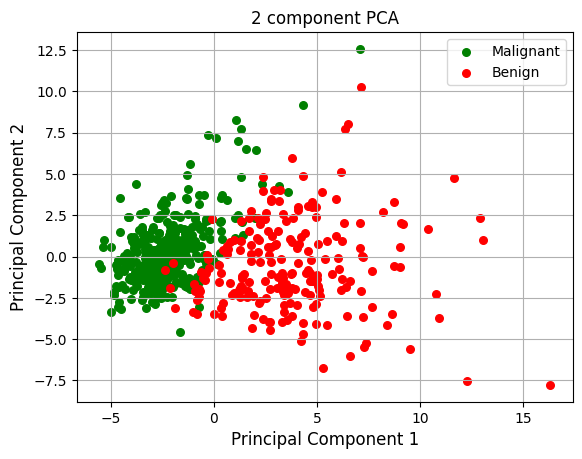

(381, 2) (188, 2) (381,) (188,)
Number of feature 2.0


Test Accuracy: 0.931


Test Accuracy: 0.931


Test Accuracy: 0.920
Test Accuracy: 0.941


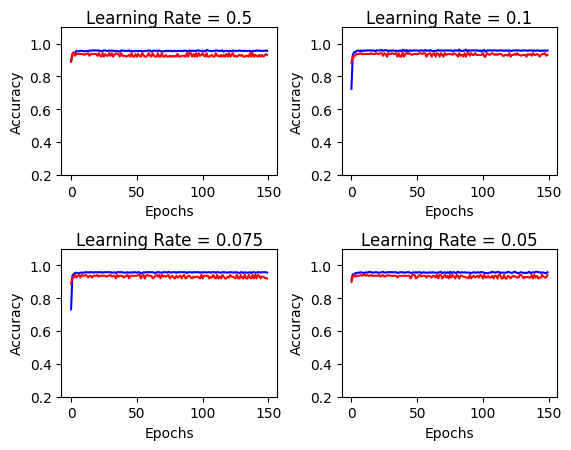

In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from keras.layers import Dense
from tensorflow.keras import initializers
from keras.utils import to_categorical
from keras.optimizers import SGD, Adam
from keras.models import Sequential
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Part1: load Breast Cancer dataset
breast = load_breast_cancer()
breast_data = breast.data
print("Data dimension: ", breast_data.shape)

X = pd.DataFrame(data = breast_data, columns = breast.feature_names)
X = X.iloc[:,0:31]
X = X.astype('float32')
breast_labels = breast.target
print("Target dimension: ",breast_labels.shape)
y = breast_labels

# Part2: Construct Breast Cancer data table
labels = np.reshape(breast_labels,(569,1))
final_breast_data = np.concatenate([breast_data,labels],axis=1)
breast_dataset = pd.DataFrame(final_breast_data)
features = breast.feature_names
print("features = ",features)

features_labels = np.append(features,'label')
breast_dataset.columns = features_labels
breast_dataset['label'].replace(0,'Benign',inplace= True)
breast_dataset['label'].replace(1,'Malignant',inplace= True)
print("\n",breast_dataset.head())

# Paer3: Use StandardScaler to standardize the dataset's features onto unit scale
x = breast_dataset.loc[:, features].values
x = StandardScaler().fit_transform(x)
print(np.mean(x),np.std(x))

feat_cols = ['feature'+str(i) for i in range(x.shape[1])]
normalised_breast = pd.DataFrame(x,columns=feat_cols)
print(normalised_breast.tail())

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns =
                           ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, breast_dataset['label']], axis = 1)
print(finalDf)

fig = plt.figure(1)
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 12)
ax.set_ylabel('Principal Component 2', fontsize = 12)
ax.set_title('2 component PCA', fontsize = 12)

targets = ['Malignant', 'Benign']
colors = ['g', 'r']
for label, color in zip(targets,colors):
    indicesToKeep = finalDf['label'] == label
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color, s = 30)
ax.legend(targets)
ax.grid()
plt.show()

def prepare_data():

    X_train, X_test, y_train, y_test = train_test_split(principalDf, y, test_size=0.33)
    print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

    n_features = X_train.shape[1]
    print('Number of feature %.1f' % n_features)
    return X_train, y_train, X_test, y_test

def fit_model(X_train, y_train, X_test, y_test, lrate):
    n_batch = 32
    model = Sequential()
    initializer = initializers.GlorotUniform(seed=1)
    model.add(Dense(45, activation='relu', kernel_initializer=initializer, input_shape=(2,)))
    model.add(Dense(45, activation='relu', kernel_initializer=initializer))
    model.add(Dense(2, activation='softmax'))
    opt = SGD(lr = lrate, momentum = 0.9)
    model.compile(optimizer=opt,loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    historyFit = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=150, verbose=0, batch_size=n_batch)
    loss, acc = model.evaluate(X_test, y_test, verbose=0)
    print('Test Accuracy: %.3f' % acc)
    plt.plot(historyFit.history['accuracy'], label='train', color='b')
    plt.plot(historyFit.history['val_accuracy'], label='test', color='r')
    plt.title('Learning Rate = '+str(lrate), pad=-40)
    plt.ylim([0.2,1.1]), plt.xlabel('Epochs'), plt.ylabel('Accuracy')

X_train, y_train, X_test, y_test = prepare_data()
learning_rates = [0.5, 0.1, 0.075, 0.05]
for i in range(len(learning_rates)):
    plot_no = (i+1)
    plt.subplot(2,2,plot_no)
    fit_model(X_train, y_train, X_test, y_test, learning_rates[i])
    
# Plot graph
plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.show()